# SWE546_Assignment4

MovieLens Recommendation System

http://grouplens.org/datasets/movielens/

Using the MovieLens 1M dataset, and using only the rankings, implement a recommendation sytem using SGD.

import pandas as pd

rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames)

The output of your program must be the highest estimated rankings for the first 10 movies of the first 20 users

Modify the program for mini batch and classical gradient descent.

Compare the running times and solution quality as a function of the batch size. SGD is when batchsize = 1, Gradient descent is batchsize = Number of observed entries in the matrix.

Submit a short report with the plots of your results.

### Name: Okan Menevşeoğlu

## 1. Stochastic Gradient Descent (Batch size = 1)

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

# Import MovieLens data
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

# Shuffle all the data
ratings = ratings.sample(frac=1)

# Print 5 sample
ratings.sample(5)

,user_id,movie_id,rating,timestamp
832935,5008,2435,5,962585265
866686,5227,2448,5,961476360
138664,889,1784,2,975250141
317199,1885,3627,2,974692581
609281,3693,1777,3,966355727


In [2]:
# Create Ys matrix from the ratings table
Ys = np.mat(ratings)

In [3]:
# Find number of users (+1 to be able to iterate)
number_of_users = np.max(Ys[:,0]) + 1

# Find number of movies (+1 to be able to iterate)
number_of_movies = np.max(Ys[:,1]) + 1

In [4]:
# Define A and B matrices as random
A = np.mat(np.random.rand(number_of_users, 1))
B = np.mat(np.random.rand(1, number_of_movies))

# Define Mask (M) and Y matrices as zero matrices according to our max. user and movie number
M = np.zeros((number_of_users, number_of_movies))
Y = np.zeros((number_of_users, number_of_movies))

In [5]:
# Iterate all of the ratings data to fill our zero Mask matrix with 1's if the data is available 
# and hold the original rating in the Y matrix.
Ysize = Ys.shape[0]
for i in range(Ysize):
    
    # Create the Mask matrix: M[user, movie]
    M[Ys[i,0], Ys[i,1]] = 1
    
    # Create the Y matrix with the original values from the ratings table
    Y[Ys[i,0] , Ys[i,1]] = Ys[i, 2]

In [6]:
# Create the Eta and EPOCH values
EPOCH = 5
Eta = 0.1
eta = Eta

# Sample_k to iterate over
sample_k = 50000

In [7]:
# Minimize the total error by iterating and taking the derivative

# Empty array to hold total error for each iteration
total_error = []
total_iteration = list(range(EPOCH))

# Iterate EPOCH times
for i in range(EPOCH):
    
    # Print average error for illustration
    E = np.multiply(M, np.subtract(Y, A*B))
    Err = np.sum(np.square(E)) / np.sum(M)
    
    # Add to array
    total_error.append(Err)
    
    # Iterate data
    for k in range(sample_k):
        
        # Define u and m values
        u = Ys[k,0]
        m = Ys[k,1]
        
        # Find error for each point
        err = Ys[k,2] - (A[u,:] * B[:,m])

        # Derivation and updating A and B values
        temp_A = A[u,:] + (eta * err[0,0] * B[:,m].T)
        B[:,m]   = B[:,m] + (eta * err[0,0] * A[u,:].T)
        A[u,:]   = temp_A

    eta = Eta * 1./(i+1)

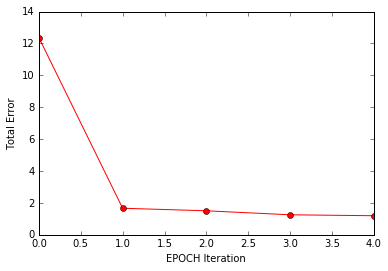

In [8]:
plt.plot(total_iteration, total_error, 'ro-')
plt.xlabel("EPOCH Iteration")
plt.ylabel("Total Error")
plt.show()

In [9]:
# Define Yr Matrix
Yr = A * B

In [10]:
# Print data
for j in range(1,21):
    
    user_data = [(0,0)]
    
    for m in range (number_of_movies):
        movie_data = (Yr[j, m], m)
        user_data.append(movie_data)
        
    user_data = sorted(user_data, key=lambda tup: tup[0], reverse=True)     
    
    print("------ Rating ------", "Movie", "for User: ", j)
    for n in range(10):
        print (user_data[n])

------ Rating ------ Movie for User:  1
(5.1959285501830283, 1939)
(5.183172063746512, 3606)
(5.0581930764213734, 3571)
(5.0465346552680224, 922)
(5.0371111160356525, 527)
(5.0057858225803855, 3469)
(4.9906456229264329, 1132)
(4.9691243324948413, 1147)
(4.960557426778788, 318)
(4.913485704773997, 3429)
------ Rating ------ Movie for User:  2
(5.8090188385247989, 1939)
(5.7947571585753126, 3606)
(5.6550313550390205, 3571)
(5.6419973058881929, 922)
(5.6314618421308085, 527)
(5.5964403405750272, 3469)
(5.5795136826813696, 1132)
(5.5554530012576278, 1147)
(5.5458752489441041, 318)
(5.4932493290056934, 3429)
------ Rating ------ Movie for User:  3
(3.7303746018103814, 1939)
(3.7212161862256554, 3606)
(3.6314885397472878, 3571)
(3.6231184711931048, 922)
(3.6163529179195986, 527)
(3.5938631785070596, 3469)
(3.5829933954240238, 1132)
(3.5675423601665499, 1147)
(3.5613918199521075, 318)
(3.5275970603563533, 3429)
------ Rating ------ Movie for User:  4
(2.4361104169381025, 1939)
(2.430129539951

## 2. Gradient Descent (Batch size =  Number of observed entries)

In [11]:
# Define Nk (Rank of observation)
Nk = 2

In [12]:
# Define A and B matrices as random with Nk columns and rows
A = np.mat(np.random.rand(number_of_users, Nk))
B = np.mat(np.random.rand(Nk, number_of_movies))

# Define Mask (M) and Y matrices as zero matrices according to our max. user and movie number
M = np.zeros((number_of_users, number_of_movies))
Y = np.zeros((number_of_users, number_of_movies))

In [13]:
# Iterate all of the ratings data to fill our zero Mask matrix with 1's if the data is available 
# and hold the original rating in the Y matrix.
Ysize = Ys.shape[0]
for i in range(Ysize):
    
    # Create the Mask matrix: M[user, movie]
    M[Ys[i,0], Ys[i,1]] = 1
    
    # Create the Y matrix with the original values from the ratings table
    Y[Ys[i,0] , Ys[i,1]] = Ys[i, 2]

In [15]:
# Create the Eta and EPOCH values
EPOCH = 5
Eta = 0.1
eta = Eta

# Sample_k to iterate over
sample_k = 50000

In [16]:
# Minimize the total error by iterating and taking the derivative

# Empty array to hold total error for each iteration
total_error = []
total_iteration = list(range(EPOCH))

# Iterate EPOCH times
for i in range(EPOCH):
    
    # Print average error for illustration
    E = np.multiply(M, np.subtract(Y, A*B))
    Err = np.sum(np.square(E)) / np.sum(M)
    
    # Add to array
    total_error.append(Err)
    
    # Iterate data
    for k in range(sample_k):
        
        # Define u and m values
        u = Ys[k,0]
        m = Ys[k,1]
        
        # Find error for each point
        err = Ys[k,2] - (A[u,:] * B[:,m])

        # Derivation and updating A and B values
        temp_A = A[u,:] + (eta * err[0,0] * B[:,m].T)
        B[:,m]   = B[:,m] + (eta * err[0,0] * A[u,:].T)
        A[u,:]   = temp_A

    eta = Eta * 1./(i+1)

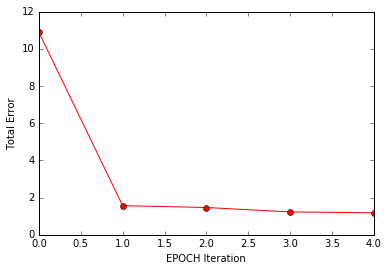

In [17]:
plt.plot(total_iteration, total_error, 'ro-')
plt.xlabel("EPOCH Iteration")
plt.ylabel("Total Error")
plt.show()

In [18]:
# Define Yr Matrix
Yr = A * B

In [19]:
# Print data
for j in range(1,21):
    
    user_data = [(0,0)]
    
    for m in range (number_of_movies):
        movie_data = (Yr[j, m], m)
        user_data.append(movie_data)
        
    user_data = sorted(user_data, key=lambda tup: tup[0], reverse=True)     
    
    print("------ Rating ------", "Movie", "for User: ", j)
    for n in range(10):
        print (user_data[n])

------ Rating ------ Movie for User:  1
(5.1641017293032556, 1939)
(5.0700170426631441, 922)
(5.0626784543221266, 3606)
(5.0547681281065699, 527)
(5.0204249495606357, 3469)
(4.9451017160228323, 670)
(4.9401745404196165, 1147)
(4.9310225237370036, 2208)
(4.9151192097301299, 318)
(4.9122190627637661, 260)
------ Rating ------ Movie for User:  2
(6.0431504901320015, 922)
(6.0035747108936413, 1939)
(5.8979840868890721, 3571)
(5.8352592376568246, 2357)
(5.8328561763231548, 2208)
(5.8068917849506061, 306)
(5.7695894746580931, 1132)
(5.755318327789122, 1284)
(5.7213078146601264, 527)
(5.7155951349416352, 1193)
------ Rating ------ Movie for User:  3
(3.9368947953417077, 922)
(3.8689333229234504, 1939)
(3.8568202332680079, 3571)
(3.8565835878818695, 1284)
(3.84692846212182, 2357)
(3.7986817933233623, 306)
(3.7874904818864703, 2208)
(3.7598949806607647, 1132)
(3.7478000847333006, 296)
(3.7122729058467518, 3429)
------ Rating ------ Movie for User:  4
(2.6808988748688103, 858)
(2.447273779697575